C:\Users\manas\AppData\Local\Temp/ipykernel_2968/31789824.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  l = linkage(model.wv.syn0, method='complete', metric='seuclidean')


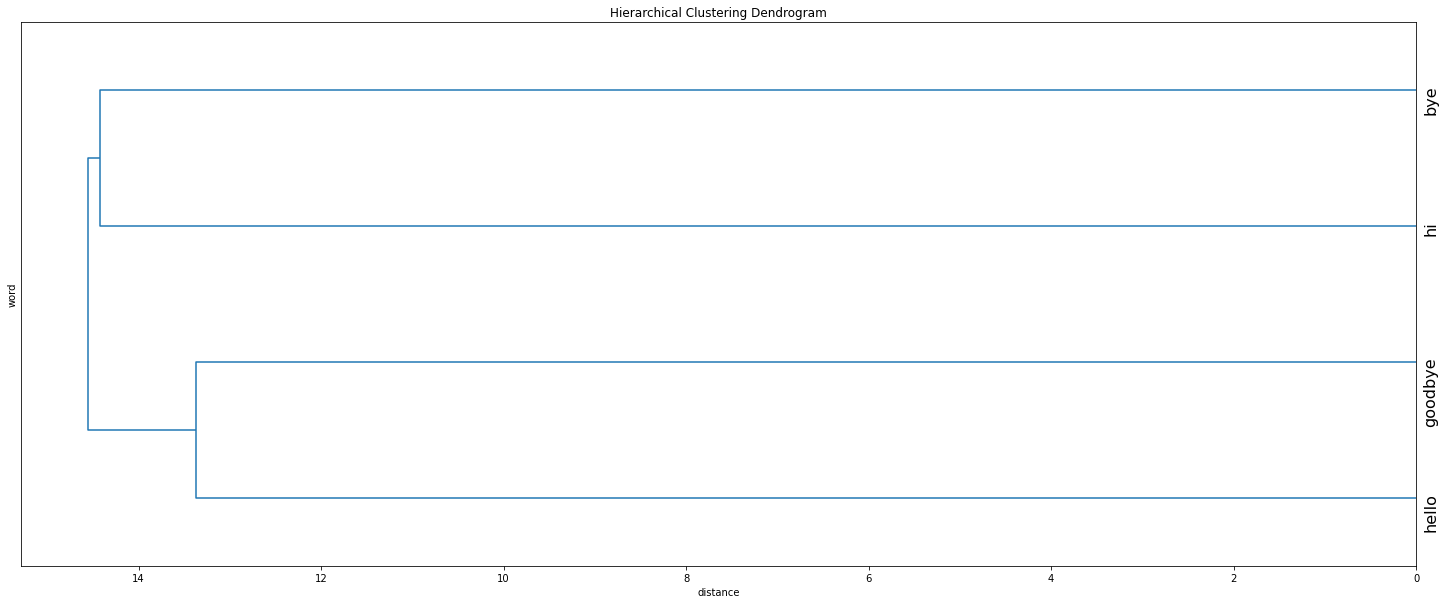

In [5]:
sentences = ['hi', 'hello', 'hi hello', 'goodbye', 'bye', 'goodbye bye']
sentences_split = [s.lower().split(' ') for s in sentences]

import gensim
model = gensim.models.Word2Vec(sentences_split, min_count=2)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()


In [31]:
import pandas as pd
import numpy as np
import gensim
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import multiprocessing
from adjustText import adjust_text
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
data_f = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\processed_data\cleaned_data.csv")
#df = data_f.head(20000)

In [54]:
df.head(3)

,skill,skill_id
0,emdr,12473585.0
1,io,955308.0
2,product development,972534.0


In [55]:
# function to clean text: tokenization, lemmatisation, remove extra spaces, stopwords and punctuation
def cleanup_text(docs, logging=True):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = re.sub('[0,1,4,5,6,7,8,9]+', ' ', doc)
        doc = re.sub(' +',' ', doc)
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwrdlist and tok not in symbols]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [57]:
# create list of skills descriptions (corpus) and clean text
skills_text = [text for text in data_f['skill']]
skills_clean = cleanup_text(skills_text)

NameError: name 'nlp' is not defined

In [35]:
sent = [row.split(',') for row in df['skill']]

sent[:10]

[['emdr'],
 ['io'],
 ['product development'],
 ['business development'],
 ['automatisering'],
 ['marketing communications'],
 ['mobile devices'],
 ['research'],
 ['communication'],
 ['new media']]

In [36]:
model = Word2Vec(sentences=sent, min_count=2, size=100, workers=5, window=5, sg=1)

C:\Users\manas\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [37]:
model.wv.most_similar('microsoft office', topn=5)

[('salesforcecom', 0.4134539067745209),
 ('industrial design', 0.41119852662086487),
 ('soccer', 0.3373190760612488),
 ('yachting', 0.2954884171485901),
 ('mode', 0.2731751799583435)]

C:\Users\manas\AppData\Local\Temp/ipykernel_18168/2087049883.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  l = linkage(model.wv.syn0, method='ward', metric='euclidean')


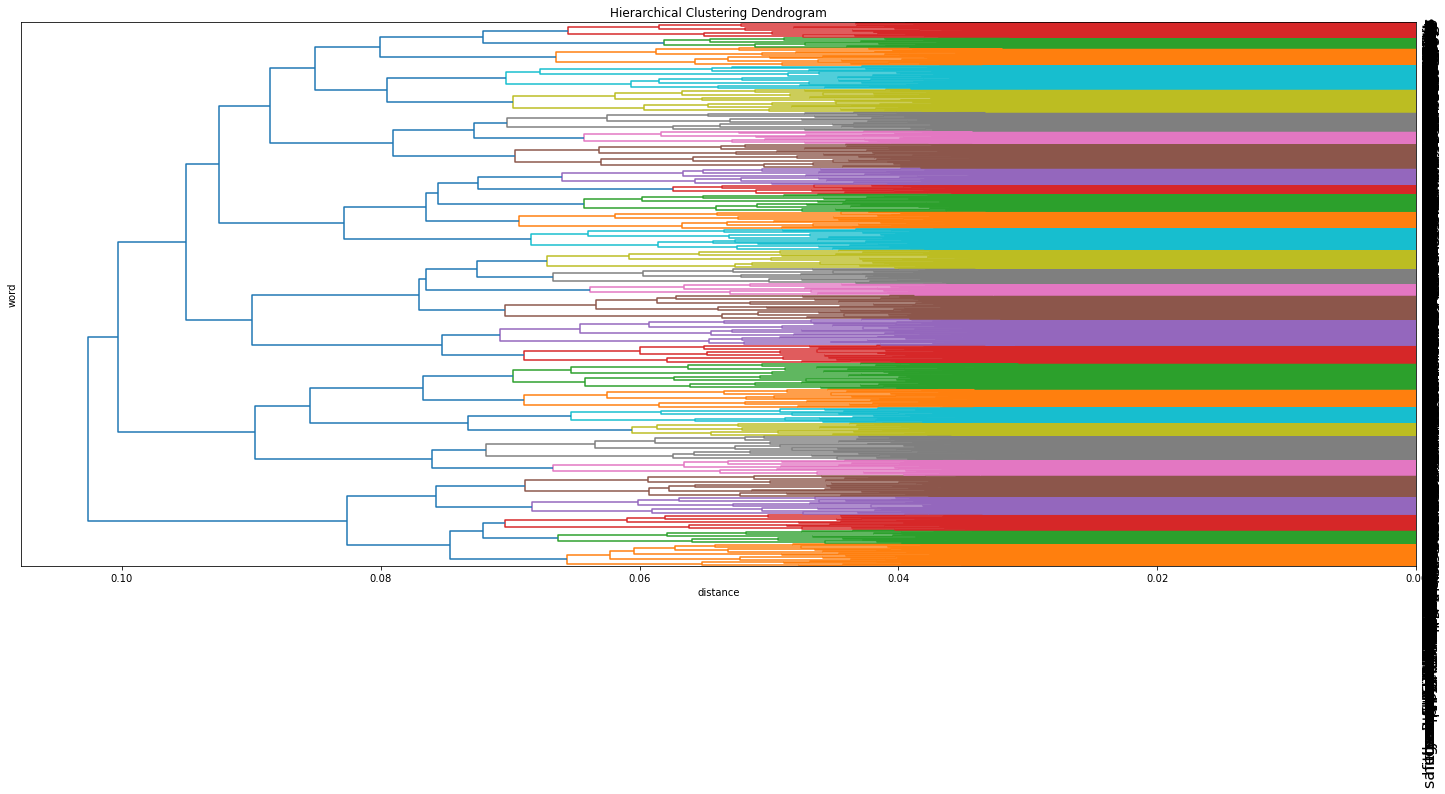

In [38]:
l = linkage(model.wv.syn0, method='ward', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()


C:\Users\manas\AppData\Local\Temp/ipykernel_18168/3016548724.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  dendrogram = sch.dendrogram(sch.linkage(model.wv.syn0, method = 'ward'))


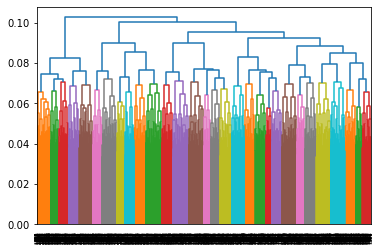

In [39]:
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(model.wv.syn0, method = 'ward'))

C:\Users\manas\AppData\Local\Temp/ipykernel_18168/3016548724.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  dendrogram = sch.dendrogram(sch.linkage(model.wv.syn0, method = 'ward'))


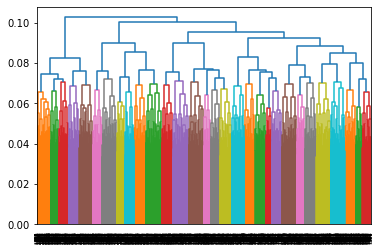

In [39]:
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(model.wv.syn0, method = 'ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage ='ward')

In [41]:
X = model.wv.syn0

C:\Users\manas\AppData\Local\Temp/ipykernel_18168/2565939860.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  X = model.wv.syn0


In [42]:
y_hc=hc.fit_predict(model.wv.syn0)

C:\Users\manas\AppData\Local\Temp/ipykernel_18168/195335554.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  y_hc=hc.fit_predict(model.wv.syn0)


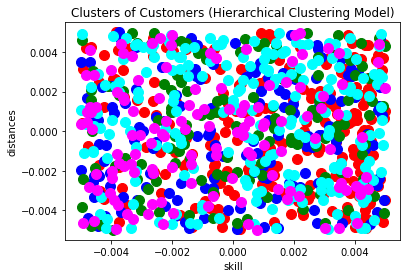

In [46]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('skill')
plt.ylabel('distances')
plt.show()